Start by importing the needed libraries

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
sns.set()

Read in the data with pandas

In [127]:
data = pd.read_csv("data/drivingTimes.csv")
data['time'] = pd.to_datetime(data['time'], format='%H:%M').dt.time
data.head()

,date,day_of_the_week,time,time_of_day,olney_secs,college_park_secs,olney_mins,college_park_mins,olney_hours,college_park_hours
0,11/13/2019,Thursday,06:00:00,Morning,2398,2405,39.966667,40.083333,0.666111,0.668056
1,11/13/2019,Thursday,06:20:00,Morning,2555,2689,42.583333,44.816667,0.709722,0.746944
2,11/13/2019,Thursday,06:40:00,Morning,2850,2774,47.500000,46.233333,0.791667,0.770556
3,11/13/2019,Thursday,07:00:00,Morning,3217,3217,53.616667,53.616667,0.893611,0.893611
4,11/13/2019,Thursday,07:20:00,Morning,3127,3167,52.116667,52.783333,0.868611,0.879722


## Commuting from Olney

Creating a dataset with just Olney time

In [129]:
data_olney = data.loc[:,["date", "day_of_the_week", 'time', 'time_of_day', 'olney_secs', 'olney_mins', 'olney_hours']]
data_olney.head()

,date,day_of_the_week,time,time_of_day,olney_secs,olney_mins,olney_hours
0,11/13/2019,Thursday,06:00:00,Morning,2398,39.966667,0.666111
1,11/13/2019,Thursday,06:20:00,Morning,2555,42.583333,0.709722
2,11/13/2019,Thursday,06:40:00,Morning,2850,47.500000,0.791667
3,11/13/2019,Thursday,07:00:00,Morning,3217,53.616667,0.893611
4,11/13/2019,Thursday,07:20:00,Morning,3127,52.116667,0.868611


### Average Times

**What is the average time communting from Olney?**

In [130]:
data_olney.loc[:,["olney_mins", 'time_of_day']].groupby('time_of_day').mean()

,olney_mins
time_of_day,
Evening,65.175096
Morning,50.419676


**What is the average time in the morning if I leave at 7?**

In [134]:
data_olney.loc[data_olney['time'] == datetime.strptime("7:00:00","%H:%M:%S").time()].loc[:,["olney_mins"]].mean()

olney_mins    50.419444
dtype: float64

**What is the average time in the evening if I leave at 4?**

In [135]:
data_olney.loc[data_olney['time'] == datetime.strptime("16:00:00","%H:%M:%S").time()].loc[:,["olney_mins"]].mean()

olney_mins    68.983333
dtype: float64

**What is the best time to go to work in the morning?**

In [154]:
avg_morning_time = data.loc[data_olney['time_of_day'] == "Morning"].loc[:,["olney_mins", 'time']].groupby('time').mean()
display(avg_morning_time)
avg_morning_time.loc[avg_morning_time['olney_mins'].idxmin()]

,olney_mins
time,
06:00:00,39.694444
06:20:00,42.580556
06:40:00,45.616667
07:00:00,50.419444
07:20:00,53.533333
07:40:00,57.150000
08:00:00,57.958333
08:20:00,56.083333
08:40:00,53.741667


olney_mins    39.694444
Name: 06:00:00, dtype: float64

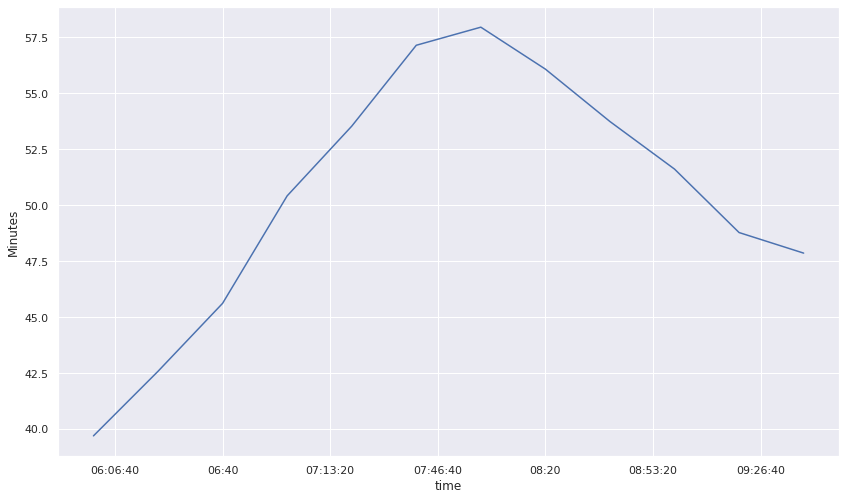

In [157]:
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=avg_morning_time.reset_index(), ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

**What is the best time to go home?**

In [155]:
avg_evening_time = data.loc[data_olney['time_of_day'] == "Evening"].loc[:,["olney_mins", 'time']].groupby('time').mean()
display(avg_evening_time)
avg_evening_time.loc[avg_evening_time['olney_mins'].idxmin()]

,olney_mins
time,
15:00:00,57.758333
15:20:00,61.533333
15:40:00,64.044444
16:00:00,68.983333
16:20:00,72.438889
16:40:00,73.641667
17:00:00,73.819444
17:20:00,73.727778
17:40:00,74.305556


olney_mins    46.65
Name: 19:40:00, dtype: float64

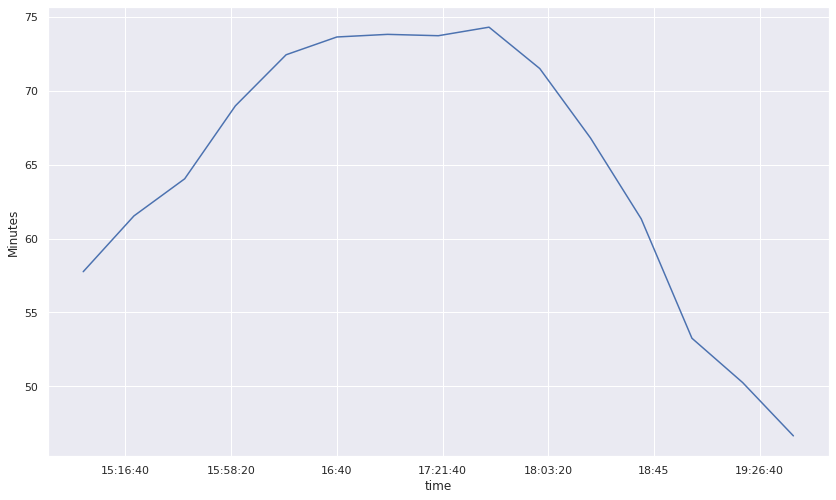

In [158]:
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=avg_evening_time.reset_index(), ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

### Comparing the days of the week

In [190]:
data_olney_dow = data_olney.loc[:,["olney_mins", 'time_of_day', 'day_of_the_week']].groupby(['time_of_day', 'day_of_the_week']).mean().reset_index()

**What are the averages for the morning?**

In [181]:
data_olney_dow_morning = data_olney_dow.loc[data_olney_dow['time_of_day'] == "Morning"]
data_olney_dow_morning.loc[:,["day_of_the_week", "olney_mins"]]

,day_of_the_week,olney_mins
5,Friday,52.983333
6,Monday,36.922222
7,Thursday,52.656250
8,Tuesday,51.588889
9,Wednesday,55.711111


**What is the quickest day of the week to get to work?**

In [182]:
data_olney_dow_morning.loc[data_olney_dow_morning['olney_mins'].idxmin()]

time_of_day        Morning
day_of_the_week     Monday
olney_mins         36.9222
Name: 6, dtype: object

**What is the longest day of the week to go to work?**

In [183]:
data_olney_dow_morning.loc[data_olney_dow_morning['olney_mins'].idxmax()]

time_of_day          Morning
day_of_the_week    Wednesday
olney_mins           55.7111
Name: 9, dtype: object

Morning time comparision

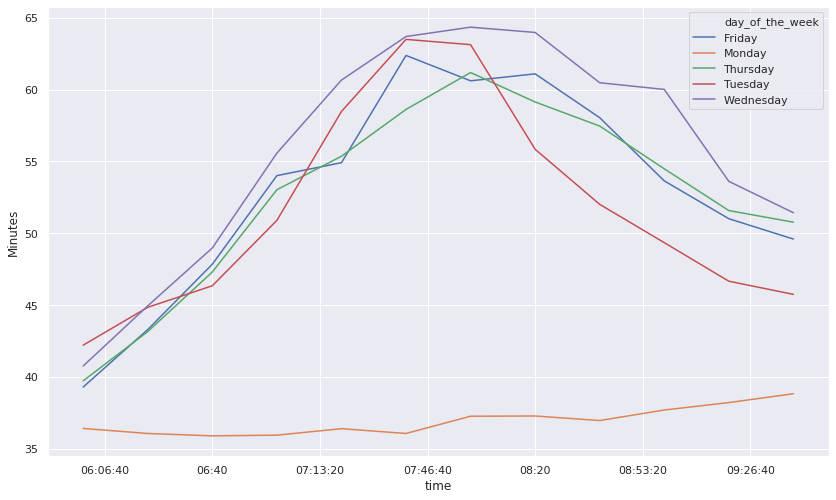

In [195]:
data_olney_morning = data_olney.loc[data_olney['time_of_day'] == "Morning"]
plot_data = data_olney_morning.groupby(['day_of_the_week', 'time']).mean().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=plot_data, hue="day_of_the_week", ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

**What are the averages for the evening?**

In [184]:
data_olney_dow_evening = data_olney_dow.loc[data_olney_dow['time_of_day'] == "Evening"]
data_olney_dow_evening.loc[:,["day_of_the_week", "olney_mins"]]

,day_of_the_week,olney_mins
0,Friday,70.672222
1,Monday,45.442222
2,Thursday,75.659877
3,Tuesday,55.544444
4,Wednesday,70.168889


**What is the quickest day of the week to get to home?**

In [185]:
data_olney_dow_evening.loc[data_olney_dow_evening['olney_mins'].idxmin()]

time_of_day        Evening
day_of_the_week     Monday
olney_mins         45.4422
Name: 1, dtype: object

**What is the longest day of the week to go to home?**

In [186]:
data_olney_dow_evening.loc[data_olney_dow_evening['olney_mins'].idxmax()]

time_of_day         Evening
day_of_the_week    Thursday
olney_mins          75.6599
Name: 2, dtype: object

Evening time comparision

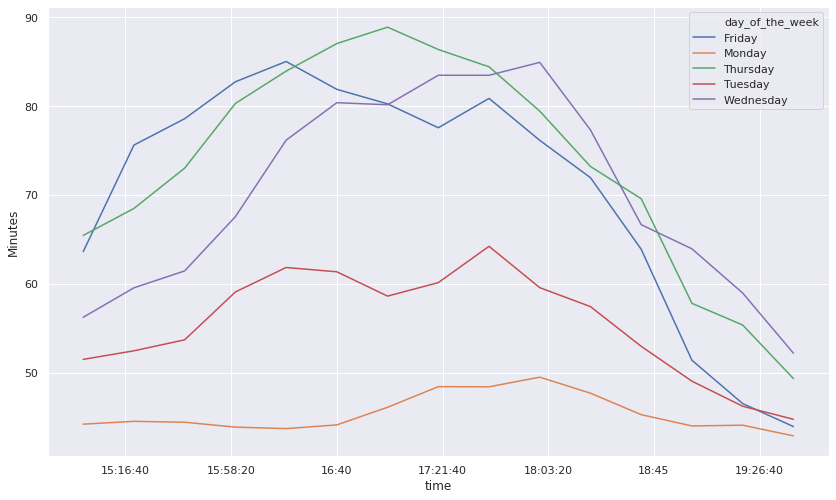

In [196]:
data_olney_morning = data_olney.loc[data_olney['time_of_day'] == "Evening"]
plot_data = data_olney_morning.groupby(['day_of_the_week', 'time']).mean().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=plot_data, hue="day_of_the_week", ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

## Comparing the two

First, we will look at some overall averages

In [161]:
data.loc[:,["olney_mins", "college_park_mins", 'time_of_day']].groupby('time_of_day').mean()

,olney_mins,college_park_mins
time_of_day,,
Evening,65.175096,62.277011
Morning,50.419676,46.596065


The averages by the day of the week

In [91]:
day_week_mean = data.loc[:,["olney_mins", "college_park_mins", 'time_of_day', 'day_of_the_week']].groupby(['time_of_day', 'day_of_the_week']).mean()
display(day_week_mean) 
day_week_mean = day_week_mean.reset_index()

olney_mins  college_park_mins
time_of_day day_of_the_week                               
Evening     Friday            70.672222          69.857778
            Monday            45.442222          37.492222
            Thursday          75.659877          74.193827
            Tuesday           55.544444          52.623333
            Wednesday         70.168889          67.684444
Morning     Friday            52.983333          49.994444
            Monday            36.922222          27.655556
            Thursday          52.656250          50.372222
            Tuesday           51.588889          48.220833
            Wednesday         55.711111          52.961111

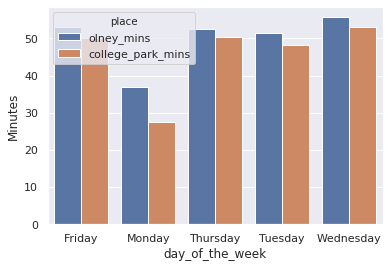

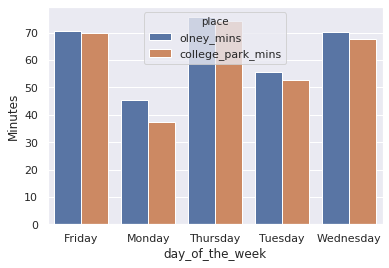

In [92]:
day_week_mean_morning = pd.melt(day_week_mean.loc[day_week_mean['time_of_day'] == "Morning"], id_vars=['time_of_day', "day_of_the_week"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots()
g = sns.barplot(x='day_of_the_week', y='minutes', data=day_week_mean_morning, ax=ax1, hue="place")

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

day_week_mean_evening = pd.melt(day_week_mean.loc[day_week_mean['time_of_day'] == "Evening"], id_vars=['time_of_day', "day_of_the_week"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots()
g = sns.barplot(x='day_of_the_week', y='minutes', data=day_week_mean_evening, ax=ax1, hue="place")

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

The averages by time

In [96]:
day_time_mean = data.loc[:,["olney_mins", "college_park_mins", 'time_of_day', 'time']].groupby(['time_of_day', 'time']).mean()
display(day_time_mean) 
day_time_mean = day_time_mean.reset_index()

olney_mins  college_park_mins
time_of_day time                                   
Evening     03:00:00   57.758333          55.605556
            03:20:00   61.533333          61.952778
            03:40:00   64.044444          63.516667
            04:00:00   68.983333          67.472222
            04:20:00   72.438889          69.225000
            04:40:00   73.641667          68.888889
            05:00:00   73.819444          72.419444
            05:20:00   73.727778          72.919444
            05:40:00   74.305556          74.258333
            06:00:00   71.505556          69.286111
            06:20:00   66.808333          63.219444
            06:40:00   61.336111          58.366667
            07:00:00   53.256667          46.760000
            07:20:00   50.256667          42.116667
            07:40:00   46.650000          38.186667
Morning     06:00:00   39.694444          38.055556
            06:20:00   42.580556          41.288889
            06:40:00   45.616667          42.913889
            07:00:00   50.419444          47.252778
            07:20:00   53.533333          49.988889
            07:40:00   57.150000          49.786111
            08:00:00   57.958333          52.819444
            08:20:00   56.083333          50.655556
            08:40:00   53.741667          51.525000
            09:00:00   51.616667          49.536111
            09:20:00   48.780556          44.561111
            09:40:00   47.861111          40.769444

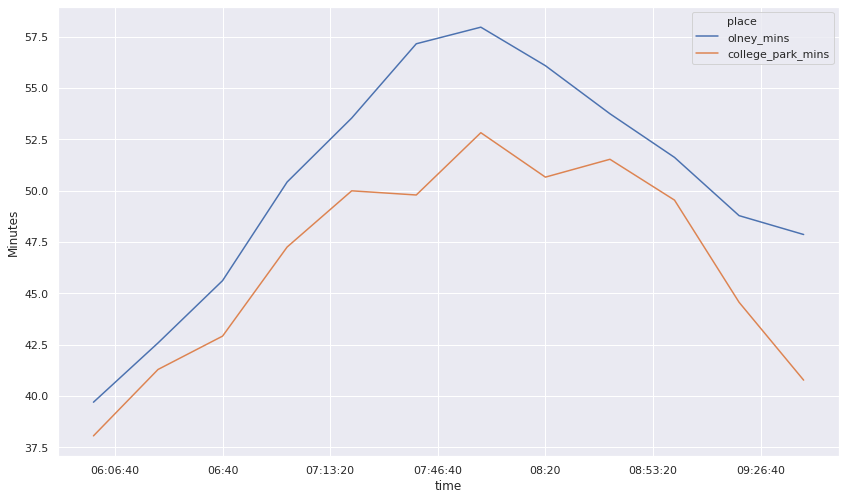

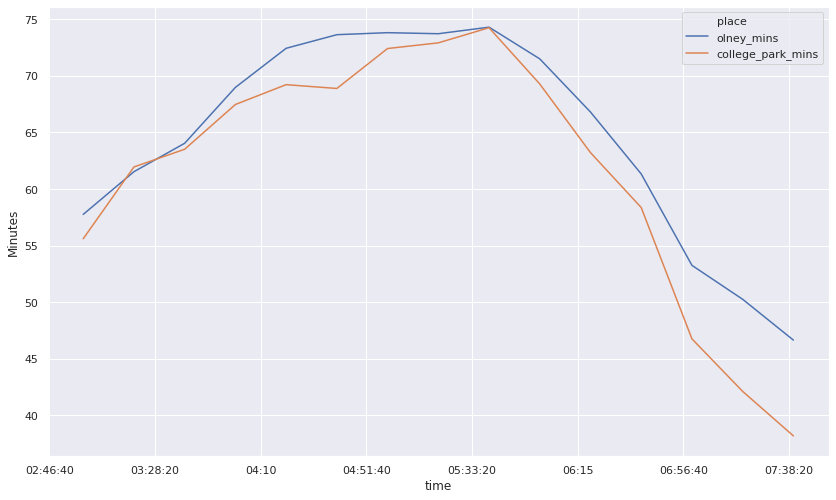

In [95]:
day_time_mean_morning = pd.melt(day_time_mean.loc[day_time_mean['time_of_day'] == "Morning"], id_vars=['time_of_day', "time"], var_name="place", value_name="minutes")

fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='minutes', data=day_time_mean_morning, ax=ax1, hue="place", sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

day_time_mean_evening = pd.melt(day_time_mean.loc[day_time_mean['time_of_day'] == "Evening"], id_vars=['time_of_day', "time"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='minutes', data=day_time_mean_evening, ax=ax1, hue="place", sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()